# Bar Chart Plotting

In this section we will work on the bar chart plotting and we will see that how can we use bar chart to get the information from data set.

To plot a bar chart we need a Categorical Variable or a metric variable. mostly we visualize the summary of the data by using the bar chart.

In this section we will use a pizza delivery dataset. which contain _day, date, time, operator, branch, deriver, temperature, bill, pizzas_ like variables. 

Now first of all we need to import the required modules.

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import colormaps, gridspec

In [2]:
plt.style.use("ggplot")

Now we will load the data.

In [3]:
df = pd.read_csv("../pizza_delivery.csv")
df.head()

,day,date,time,operator,branch,driver,temperature,bill,pizzas,free_wine,got_wine,discount_customer
0,Thursday,01-May-14,35.128367,Laura,East,Bruno,68.287716,58.4,4,0,0,1
1,Thursday,01-May-14,25.203074,Melissa,East,Salvatore,70.997791,26.4,2,0,0,0
2,Thursday,01-May-14,45.643404,Melissa,West,Salvatore,53.394145,58.1,3,1,0,0
3,Thursday,01-May-14,29.374298,Melissa,East,Salvatore,70.306596,35.2,3,0,0,0
4,Thursday,01-May-14,29.994610,Melissa,West,Salvatore,71.501688,38.4,2,0,0,0


Now we will first convert the data type for further operations. in this dataset we don't have any null values.

In [4]:
df= df.convert_dtypes()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1266 entries, 0 to 1265
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   day                1266 non-null   string 
 1   date               1266 non-null   string 
 2   time               1266 non-null   Float64
 3   operator           1266 non-null   string 
 4   branch             1266 non-null   string 
 5   driver             1266 non-null   string 
 6   temperature        1266 non-null   Float64
 7   bill               1266 non-null   Float64
 8   pizzas             1266 non-null   Int64  
 9   free_wine          1266 non-null   Int64  
 10  got_wine           1266 non-null   Int64  
 11  discount_customer  1266 non-null   Int64  
dtypes: Float64(3), Int64(4), string(5)
memory usage: 127.5 KB


Now we can process the plotting in b/w the Categorical variable and the numerical variable.

### Summary Points

1. Revenue Generated by the individual operator.
2. Revenue Generated by individual branch
3. Revenue Generated by individual driver
4. Total pizza delivered by the individual driver.
5. Total pizza delivered by the individual Day or per week.


Now we will show the summary for each points.

#### 1. Revenue generated by the individual operator.

To plot the bar chart for this summary, first we need to get the total billing by each category. we will use the `pd.groupby()` method to get that summary.

In [5]:
# calculating the total billing by each operator.

operator_group = df.groupby("operator")

# Now calculate the on the bill column.
operator_bill =  operator_group.bill.sum()
operator_bill

operator
Laura      27163.0
Melissa    26966.0
Name: bill, dtype: Float64

 Now we have the summary data, total billing for each operator, it's time to plot the bar chart. 

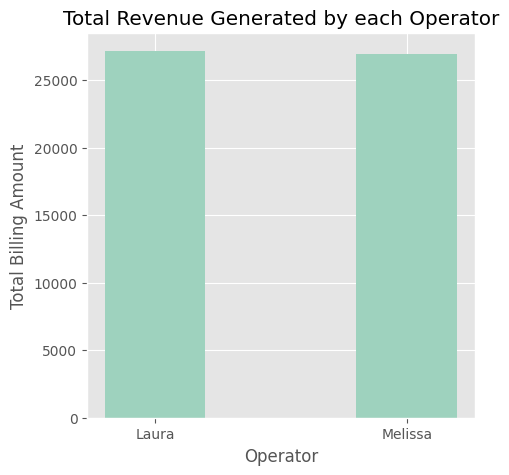

In [6]:
# first of all we need to plot the figure and an axes.
fig, axes = plt.subplots(figsize = (5, 5))

# Now we will plot the bar graph.
axes.bar(operator_bill.index, operator_bill, width= .4, color="#9ED2BE")

# setting the x and y label
axes.set_xlabel("Operator")
axes.set_ylabel("Total Billing Amount")

# Now we will set the title for our graph.
plt.title("Total Revenue Generated by each Operator")
plt.show()

From above graph we can see that we have equal amount of revenue. Now we will summarize the revenue generated by the each branch.

#### 2. Revenue Generated by individual branch

In this we will plot the bar graph for summary of total revenue generated by individual branch.

In [7]:
# first we will get the  total billing by each branch.
branch_group = df.groupby("branch")

# Now we will get the total billing by selecting the bill column on the grouped data.
branch_bill =  branch_group.bill.sum()
branch_bill

branch
Centre    19831.4
East      15064.2
West      19233.4
Name: bill, dtype: Float64

Now we will plot the bar graph.

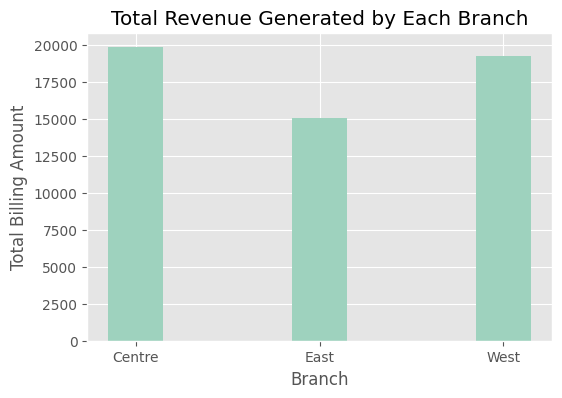

In [8]:
# first of all we need to plot the figure and an axes.
fig, axes = plt.subplots(figsize = (6, 4))

# ploting the bar graph of the summary.
axes.bar(branch_bill.index, branch_bill, width=0.3, color="#9ED2BE")

# setting the x and y label
axes.set_xlabel("Branch")
axes.set_ylabel("Total Billing Amount")

# Now we will set the title for our graph.
plt.title("Total Revenue Generated by Each Branch")
plt.show()

From above graph, we can say that East branch generated less than the center and west branch. If we want to find out the reason for this difference then we can calculate the more summary on individual variable, but for now we will only use the bar graph.

Next we will plot the graph for each individual driver.

#### 3. Revenue Generated by individual driver

In this we will plot the summary of total revenue generated by individual drivers, by calculating the the total billing amount for each individual driver.

In [9]:
#  calculating the total amount of billing generated by each driver.

# grouping by the driver.
driver_group = df.groupby("driver")

# total amount of billing generated by each driver.
driver_bill = driver_group.bill.sum()
driver_bill

driver
Bruno        14684.7
Domenico      3095.8
Luigi         5831.0
Mario        15364.6
Salvatore    15152.9
Name: bill, dtype: Float64

Now we will plot the above summary.

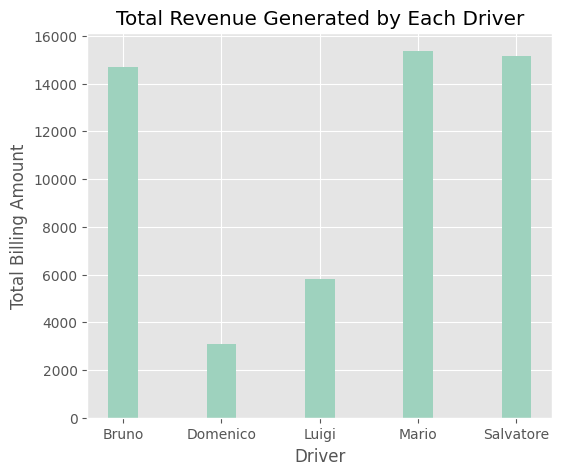

In [10]:
# first of all we need to plot the figure and an axes.
fig, axes = plt.subplots(figsize = (6, 5))

# plotting the bar graph.
axes.bar(driver_bill.index, driver_bill, width=0.3, color="#9ED2BE")

# setting the x and y label
axes.set_xlabel("Driver")
axes.set_ylabel("Total Billing Amount")

# Now we will set the title for our graph.
plt.title("Total Revenue Generated by Each Driver")
plt.show()

#### Plotting all three summary in a single figure.

Now we will plot all the above summary in a single figure, plotting the in a single figure can give us a better understanding on the billing on some information, and it always looks good to see all information at one place.

To plot three summary in a single figure we need to create three axes by `plt.subplot` with given `nrow & ncol` arguments.

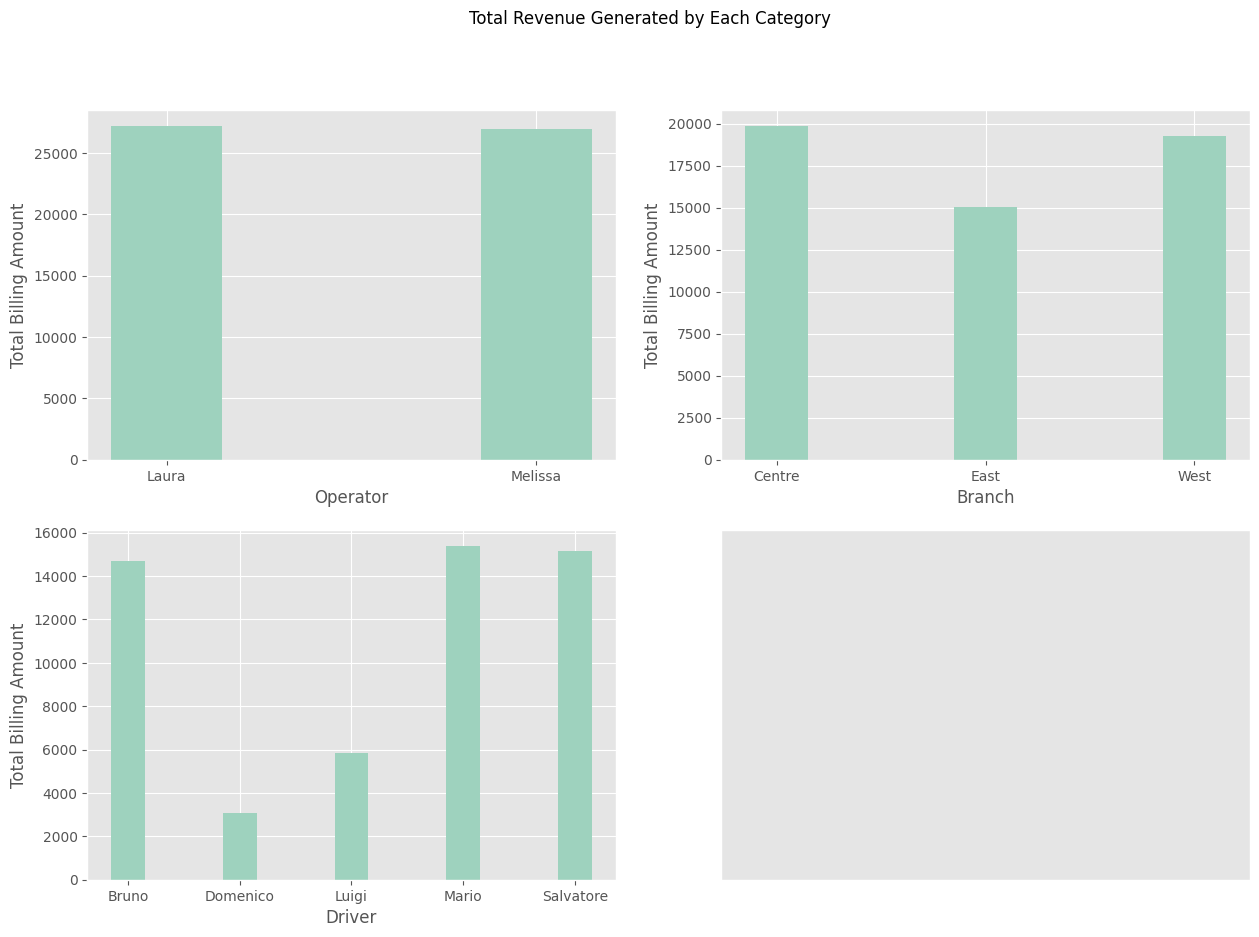

In [11]:
# first of all we need to plot the figure and an axes.
fig, axes = plt.subplots(figsize = (15, 10), ncols=2, nrows=2)

# unpacking the axes for their corresponding summary.
((operator_axes, branch_axes), (driver_axes, empty)) = axes

operator_axes.bar(operator_bill.index, operator_bill, width=.3, color="#9ED2BE")
branch_axes.bar(branch_bill.index,branch_bill, width=.3, color="#9ED2BE")
driver_axes.bar(driver_bill.index, driver_bill, width=.3, color="#9ED2BE")

# Now we will plot

# setting the x and y label
operator_axes.set_xlabel("Operator")
operator_axes.set_ylabel("Total Billing Amount")

branch_axes.set_xlabel("Branch")
branch_axes.set_ylabel("Total Billing Amount")

driver_axes.set_xlabel("Driver")
driver_axes.set_ylabel("Total Billing Amount")

empty.get_xaxis().set_visible(False)
empty.get_yaxis().set_visible(False)

# Now we will set the title for our graph.
fig.suptitle("Total Revenue Generated by Each Category")
plt.show()

#### Plotting The Group Bar Chart

1. Group Bar Chart Primary Categorical Variable as Operator and Secondary Categorical Variable as Branch for Total Billing Amount.
2. Group Bar Chart Primary Categorical Variable as Branch and Secondary Categorical Variable as Driver for Total Billing Amount.

We will plot the Chart in b/w the (_Operator,Branch_) & total billing amount, (_Branch,Driver_) & billing amount in a single figure.

First we need to calculate the by per branch under individual operator.

In [12]:
# first creating the group by using the operator.
operator_group = df.groupby('operator')

# now we will create one more grouping on this group object by using the branch column.
# but for that we need to use the apply method.
branch_per_operator = operator_group.apply(lambda x:x.groupby("branch").bill.sum())

# branch_per_operator=  branch_per_operator.T
branch_per_operator 

branch,Centre,East,West
operator,,,
Laura,10090.2,7598.2,9474.6
Melissa,9741.2,7466.0,9758.8


As above now we will calculate the total billing amount by each driver in each branch.

In [13]:
# first we will create the group for the branch
branch_group = df.groupby("branch")

# Now we will create the sub groups by each driver from the `branch_group`
driver_per_branch = branch_group.apply(lambda x: x.groupby("driver").bill.sum())
driver_per_branch

driver,Bruno,Domenico,Luigi,Mario,Salvatore
branch,,,,,
Centre,6346.9,589.1,1980.6,5157.0,5757.8
East,3083.4,1766.3,2204.9,4805.0,3204.6
West,5254.4,740.4,1645.5,5402.6,6190.5


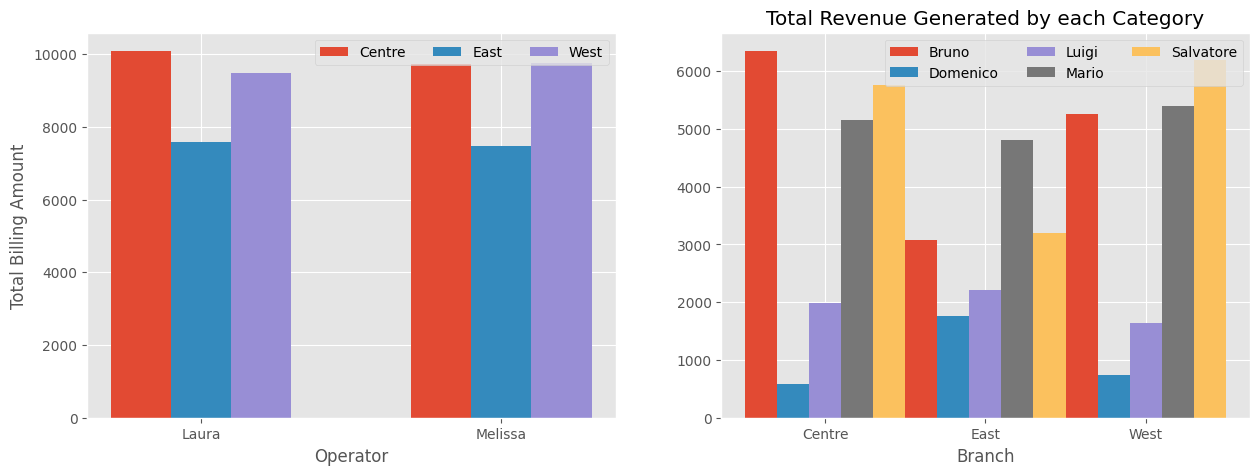

In [14]:
# first of all we need to plot the figure and an axes.
fig, (axes1, axes2) = plt.subplots(figsize = (15, 5), ncols=2)

#  color="#9ED2BE"

# since in this section we are creating the grouped bar chart so first we need to create a dummy x label ticks.
labels1 = np.arange(len(operator_bill.index))
labels2 = np.arange(len(driver_per_branch.index))

wid = 0.2  # width of the each bar.
offset = 0 # offset for each bar for next branch.
for operator, branch in branch_per_operator.items():
    axes1.bar(labels1+offset, branch, width=wid, label=operator)
    offset += wid

offset = 0
for branch, driver in driver_per_branch.items():
    axes2.bar(labels2 + offset, driver, width=wid, label=branch)
    offset += wid

# setting the x and y label
axes1.set_ylabel("Total Billing Amount")
axes1.set_xlabel("Operator")
axes1.legend(loc="upper right", ncols=3)
axes1.set_xticks(labels1+wid, branch_per_operator.index)


axes2.set_xlabel("Branch")
axes2.legend(loc="upper right", ncols=3)
axes2.set_xticks(labels2+wid*2, driver_per_branch.index)
# axes2.set_ylabel("Total Billing Amount")  # sharing the y axi

# Now we will set the title for our graph.
plt.title("Total Revenue Generated by each Category")
plt.show()

From above result we can see that we have grouped bar chart with (_Operator,Branch->Billing_) & (_Branch,Driver->Billing_) but the problem is that left graph is slightly bigger and we don't have enough space in right side graph so to make it more meaningful we need to adjust their size.

To adjust their size we can use the `GridSpec` class to only create grids and then add subplots to that figure with grid spanning. 

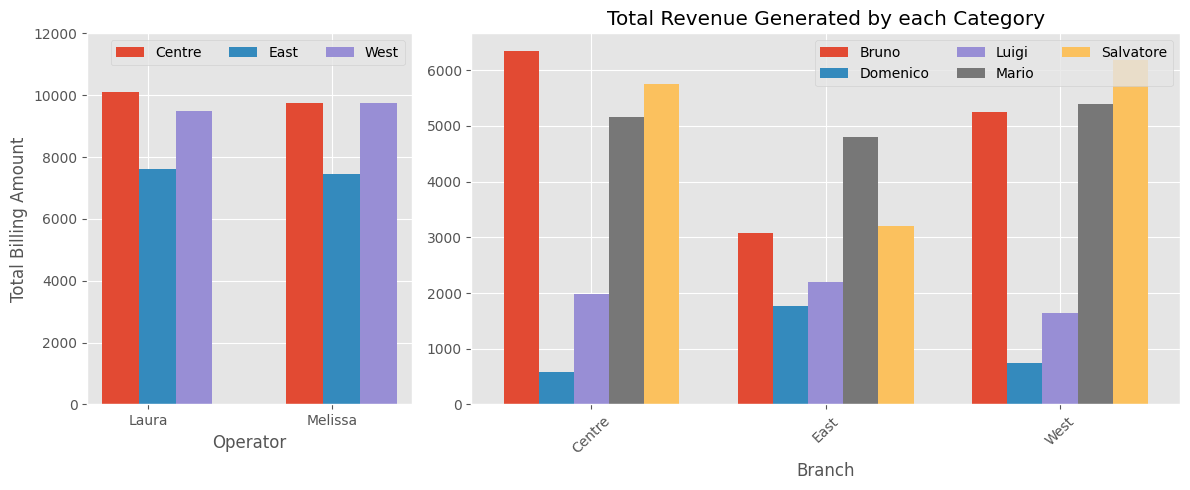

In [15]:
# Now first we will create the Figure
fig = plt.figure(figsize=(12, 5), tight_layout=True)
grid = gridspec.GridSpec(1,3)
# Now we will add a new subplot
axes1 = fig.add_subplot(grid[0,0])  # creating first axes at first row and first column.
axes2 = fig.add_subplot(grid[0,1:]) 

labels1 = np.arange(len(operator_bill.index))
labels2 = np.arange(len(driver_per_branch.index))

wid = 0.2  # width of the each bar.
offset = 0 # offset for each bar for next branch.
for operator, branch in branch_per_operator.items():
    axes1.bar(labels1+offset, branch, width=wid, label=operator)
    offset += wid

offset = 0
wid = 0.15
for branch, driver in driver_per_branch.items():
    axes2.bar(labels2 + offset, driver, width=wid, label=branch)
    offset += wid

# setting the x and y label
axes1.set_ylabel("Total Billing Amount")
axes1.set_xlabel("Operator")
axes1.legend(loc="upper right", ncols=3)
axes1.set_xticks(labels1+wid, branch_per_operator.index)
axes1.set_ylim(0, 12000)

axes2.set_xlabel("Branch")
axes2.legend(loc="upper right", ncols=3)
axes2.set_xticks(labels2+wid*2, driver_per_branch.index)
axes2.tick_params(axis='x', rotation=44)

# Now we will set the title for our graph.
plt.title("Total Revenue Generated by each Category", loc="center")
plt.show()

#### 4.Total pizza delivered by the individual driver.

Now in this section we will plot a bar chart for total amount of deliveries of pizza by the individual driver.

First we need to get the group for each driver, and then we will calculate the total pizza delivered by the individual driver.

In [16]:
# grouping by the driver
driver_group = df.groupby("driver")

drivers_pizzas = driver_group.pizzas.sum()
drivers_pizzas

driver
Bruno        1046
Domenico      202
Luigi         390
Mario        1050
Salvatore    1127
Name: pizzas, dtype: Int64

Also we will plot that how much deliveries performed by the each driver, we will plot both data along side by using the grouped bar chart.


In [17]:
# now we will compute the total amount of deliveries done by the each driver. using the driver_group data.
drivers_deliveries =   driver_group.pizzas.count()
drivers_deliveries

driver
Bruno        329
Domenico      93
Luigi        142
Mario        358
Salvatore    344
Name: pizzas, dtype: int64

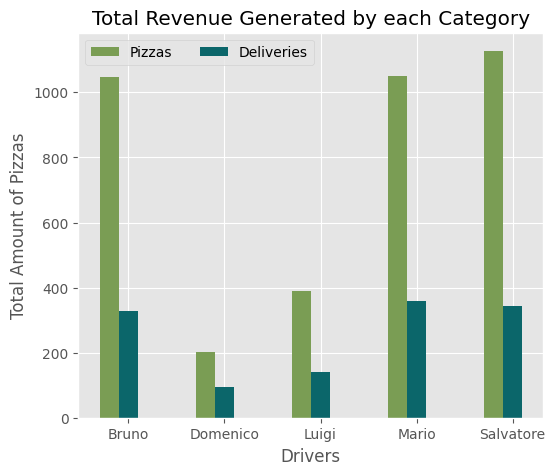

In [18]:
# first of all we need to plot the figure and an axes.
fig, axes = plt.subplots(figsize = (6, 5))

#  color="#9ED2BE"
# Note : we will plt a grouped bar chat so we need to create a dummy axis label.
labels = np.arange(len(drivers_deliveries.index))
offset = 0
wid = 0.2

# Now first we will plot the drivers_pizzas amount 
axes.bar(labels, drivers_pizzas, width=wid, color='#7A9D54', label="Pizzas")
axes.bar(labels+wid, drivers_deliveries, width=wid, color="#0B666A", label="Deliveries")
axes.legend(loc='upper left', ncols=2)

# Now we need to set the axes labels
axes.set_xticks(labels+wid, drivers_deliveries.index)

# setting the x and y label
axes.set_xlabel("Drivers")
axes.set_ylabel("Total Amount of Pizzas")

# Now we will set the title for our graph.
plt.title("Total Revenue Generated by each Category")
plt.show()

#### 5. Total pizza delivered by the individual Day or per week

Now in this section we will plot the pizza delivered by each day and also revenue generated by the individual day. for that we will plot two different plots/axes on the figure. in this we we will not plot the grouped bar chart since our data point are too much for that.

In [19]:
# first we will compute the sum of deliveries and revenue generated by each single day.
day_group = df.groupby("date")

day_pizzas = day_group.pizzas.sum()
day_bill = day_group.bill.sum()
# day_day = day_group.day

date_summary =  pd.DataFrame(
    {"Bill": day_bill, 
     "Pizzas":day_pizzas, 
     "Day":day_group.day.apply(lambda x: x.drop_duplicates().item())}, index = day_pizzas.index)
date_summary.head()

,Bill,Pizzas,Day
date,,,
01-May-14,2125.2,146,Thursday
02-May-14,2173.0,145,Friday
03-May-14,2111.0,170,Saturday
04-May-14,2011.1,155,Sunday
05-May-14,1400.9,105,Monday


Now we have the full month summary and we are going to plot that summary in two different plots. In Addition we will plot billing summary with three different color pattern. weekStart, weekEnd, midWeek. 

By this we can get more information about that in which day we may have more orders.

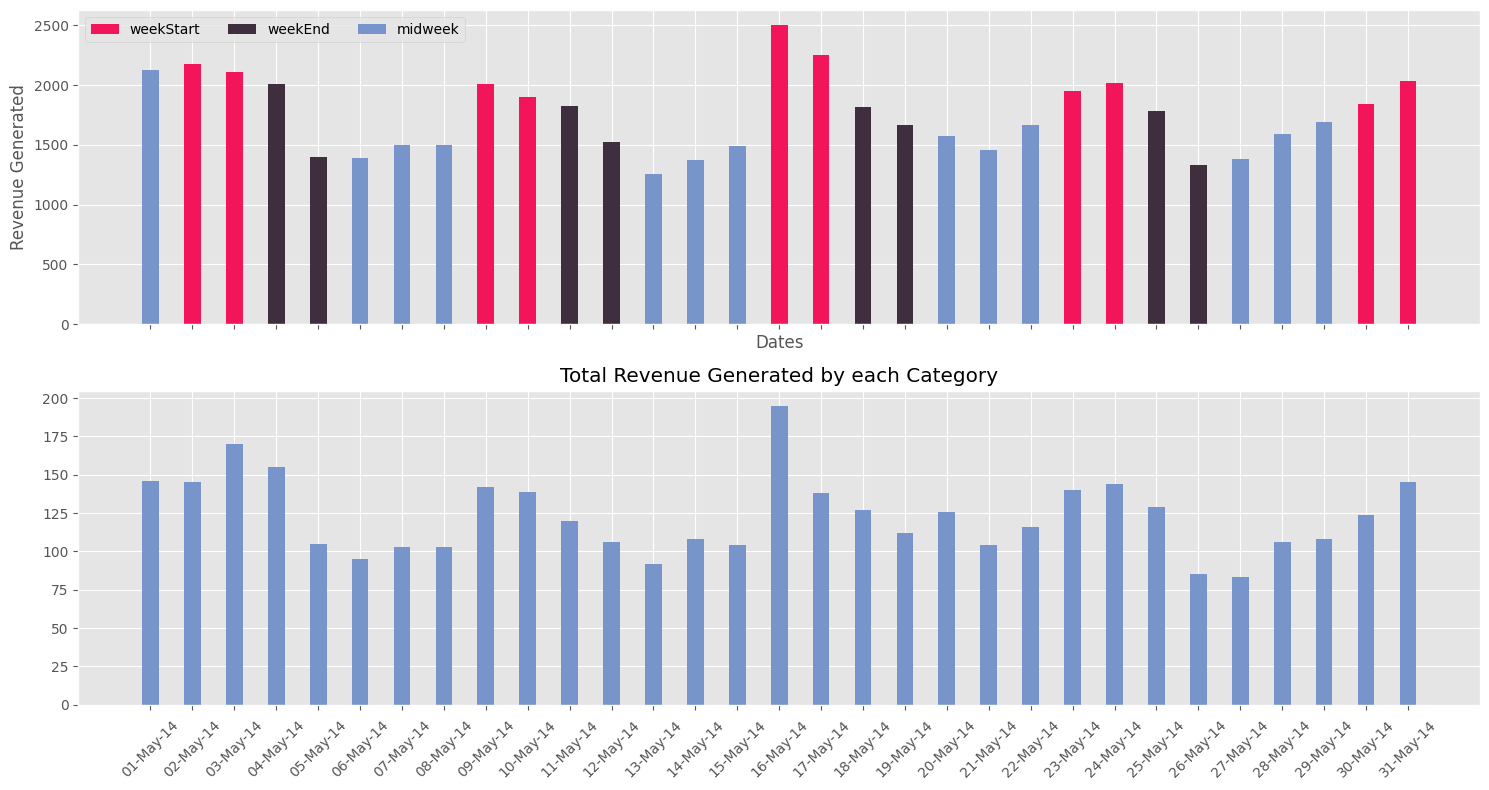

In [20]:
# first of all we need to plot the figure and an axes.
# in this we need two rows for two different axes
fig, (axes1, axes2) = plt.subplots(figsize = (15, 8), nrows=2, sharex=True, tight_layout=True)

# color=["#F31559", "#3F2E3E"]
# Now we will first plot the axes1, in this we will plot the revenue generated by per day.

# week starting 
weekStart = date_summary.Day.isin(["Friday","Saturday"]) * date_summary.Bill
weekEnd = date_summary.Day.isin(["Sunday","Monday"]) * date_summary.Bill
midweek = (~(date_summary.Day.isin(["Friday","Saturday"]) | date_summary.Day.isin(["Sunday","Monday"]))) *  date_summary.Bill

axes1.bar(date_summary.index, weekStart, width=0.4, color="#F31559" , label='weekStart')
axes1.bar(date_summary.index, weekEnd, width=0.4, color ="#3F2E3E", label='weekEnd')
axes1.bar(date_summary.index, midweek, width=0.4, color ="#7895CB", label='midweek')

axes2.bar(date_summary.index, date_summary.Pizzas, width=0.4, color="#7895CB")


# setting the x and y label
axes1.set_xlabel("Dates")
axes1.set_ylabel("Revenue Generated")

axes1.legend(loc='upper left', ncols=3)

axes2.tick_params(axis='x', rotation = 45, pad=6)
fig.align_labels(axs=axes2)
# Now we will set the title for our graph.
plt.title("Total Revenue Generated by each Category", loc='center')
plt.show()

From above analysis we can say that, at the starting of the week (_sunday,monday_) we always have more order than order day and (_Tuesday,wednesday,Thursday_) we mostly get less order compare to the weekStart days and weekEnd days.

Now we will plot the Billing and Pizza grouped by day. in this way we can analysis the day selling more efficiently.


#### 7. Total Revenue Generated by Week Day and total pizza delivered 


In [21]:
# Now we will create a group by day.
day_group = df.groupby("day")

day_bill = day_group.bill.sum()
day_pizzas = day_group.pizzas.sum()

day_data = pd.DataFrame({"Bill": day_bill, "Pizzas": day_pizzas}, index = day_bill.index)
day_data

,Bill,Pizzas
day,,
Friday,10477.4,746
Monday,5927.8,408
Saturday,10317.9,736
Sunday,7429.3,531
Thursday,8466.8,577
Tuesday,5600.8,396
Wednesday,5909.0,421


In [22]:
day_data.sort_values("Bill", ascending=False, inplace=True)

Now we have all the summary about the week days, now we will plot both the data using the grouped bar chart.


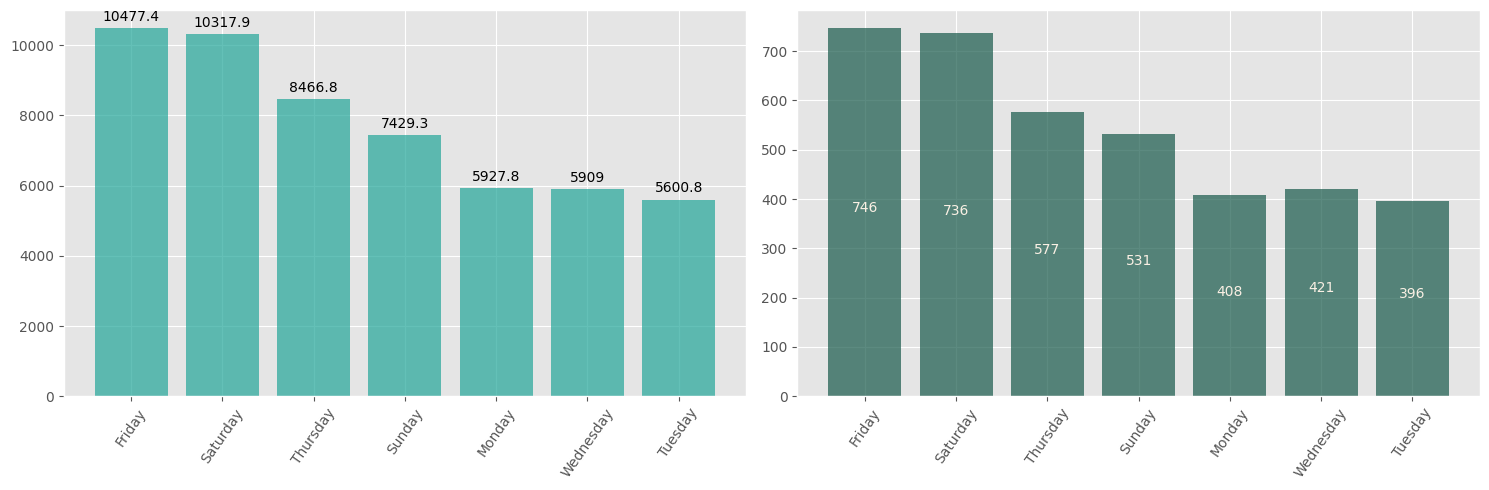

In [23]:
fig, (axes1, axes2) = plt.subplots(figsize = (15, 5), tight_layout= True, ncols=2)

rect1 = axes1.bar(day_data.index, day_data.Bill,  color="#22A699", alpha=.7)
rect2 = axes2.bar(day_data.index, day_data.Pizzas, color="#17594A", alpha=.7)

# bar_label method will plot the length of the bar at the top or center of the bar
# according to the label_type. this can help us to compare the bars.
axes1.bar_label(rect1, padding=3, label_type='edge') 
axes2.bar_label(rect2, padding=3, label_type='center', color='#FAF0E4') 


axes1.tick_params(axis='x', rotation=55)
axes2.tick_params(axis='x', rotation=55)

plt.show()

As we can see from above graph that three days of weekend (_Friday, Saturday, Thursday_) has the maximum selling. Now we will slightly modify our bar graph, we will now make a stacked bar graph in which we will see that which driver is contributed more and which less.

But before plotting we need to prepare the data, we need to create another subgroup on the `day_group` by using the `driver` column. 

In [24]:
df.driver.unique()

<StringArray>
['Bruno', 'Salvatore', 'Mario', 'Luigi', 'Domenico']
Length: 5, dtype: string

In [34]:
day_group.apply(lambda x: x.groupby("driver").bill.sum())

day        driver   
Friday     Bruno        2836.1
           Luigi        2344.6
           Mario        2656.7
           Salvatore    2640.0
Monday     Bruno        2823.3
           Salvatore    3104.5
Saturday   Bruno        2410.1
           Domenico     1494.7
           Luigi        2195.4
           Mario        1764.4
           Salvatore    2453.3
Sunday     Bruno        1272.0
           Domenico     1601.1
           Luigi        1291.0
           Mario        1668.6
           Salvatore    1596.6
Thursday   Bruno        2572.8
           Mario        3122.3
           Salvatore    2771.7
Tuesday    Bruno        2770.4
           Mario        2830.4
Wednesday  Mario        3322.2
           Salvatore    2586.8
Name: bill, dtype: Float64

In [25]:
# now we will create a function to create sub group with having same number of indexing so we can use that
# data to plot the stacked baraa chart.

# if we don't have a equal number of index values then we will have error to plot the stacked bar chart.
def createGroup(dataframe):
    # first create the group
    group = dataframe.groupby('driver')
    bill_sum = group.bill.sum()
    bill_sum = bill_sum.reindex(['Bruno', 'Salvatore', 'Mario', 'Luigi', 'Domenico'], fill_value = 0)
    bill_sum = bill_sum.sort_index()
    return bill_sum

day_driver_data = day_group.apply(lambda x: createGroup(x))
day_driver_data['total'] = day_driver_data.sum(axis=1)
day_driver_data.sort_values('total', inplace=True, ascending=False)
day_driver_data

driver,Bruno,Domenico,Luigi,Mario,Salvatore,total
day,,,,,,
Friday,2836.1,0.0,2344.6,2656.7,2640.0,10477.4
Saturday,2410.1,1494.7,2195.4,1764.4,2453.3,10317.9
Thursday,2572.8,0.0,0.0,3122.3,2771.7,8466.8
Sunday,1272.0,1601.1,1291.0,1668.6,1596.6,7429.3
Monday,2823.3,0.0,0.0,0.0,3104.5,5927.8
Wednesday,0.0,0.0,0.0,3322.2,2586.8,5909.0
Tuesday,2770.4,0.0,0.0,2830.4,0.0,5600.8


Now we have the complete data to plot the stacked bar chart, our strategy is to plot each individual driver week data individually by using the for loop, in each iteration we will have the series of the single column, and also we will maintain the color code for each individual driver with labels as well.

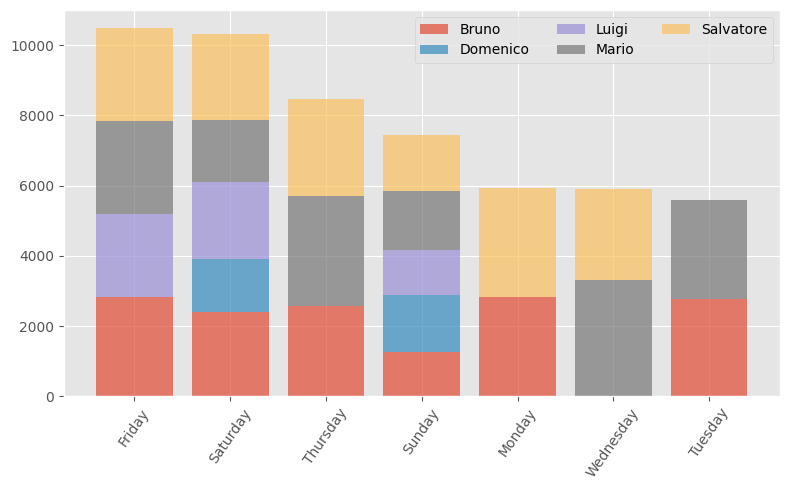

In [26]:
fig, axes = plt.subplots(figsize = (8, 5), tight_layout= True)


offset = np.zeros(len(day_driver_data.index))
# offset from the baseline, this offset will decide the position of the staked bar in order.
# we will add the heights of the currently stacked bars to get the position for next bar to be 
# stacked, we will pass this offset to bottom parameter.
day_driver_data.drop('total',axis=1, inplace=True)
for _, column in day_driver_data.items():
    series_name = column.name
    axes.bar(day_driver_data.index, column, alpha=.7, label = series_name, bottom= offset)
    offset += column
    
    # Note in this 
# bar_label method will plot the length of the bar at the top or center of the bar
# according to the label_type. this can help us to compare the bars.
# axes.bar_label(rect1, padding=3, label_type='edge') 
axes.tick_params(axis='x', rotation=55)
axes.legend(loc='upper right', ncols=3)
plt.show()

In [27]:
day_driver_data.sum(axis=1)

day
Friday       10477.4
Saturday     10317.9
Thursday      8466.8
Sunday        7429.3
Monday        5927.8
Wednesday     5909.0
Tuesday       5600.8
dtype: float64

In [28]:
np.zeros(len(day_driver_data.index))

array([0., 0., 0., 0., 0., 0., 0.])